<a href="https://colab.research.google.com/github/niksinfinity/ML_AI_Notebooks/blob/master/catvsnoncat_Experiment_Using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
import os 
import h5py
os.listdir('./ML_datasets/catsvsdogs/')

['test_catvnoncat.h5', 'train_catvnoncat.h5']

In [0]:
# !git clone https://github.com/niksinfinity/ML_datasets.git

In [0]:
train_data = h5py.File('./ML_datasets/catsvsdogs/train_catvnoncat.h5')
test_data = h5py.File('./ML_datasets/catsvsdogs/test_catvnoncat.h5')

In [0]:
classes_train,train_x_orig,train_y_orig=map(lambda x:np.array(x),train_data.values())
classes_test,test_x_orig,test_y_orig=map(lambda x:np.array(x),test_data.values())

In [187]:
train_x_flatten = train_x_orig.reshape(train_x.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x.shape[0], -1).T
# train_y = train_y_orig.reshape(train_y.shape[1],1).T
# test_y =  test_y_orig.reshape(test_y.shape[1],1).T
print(train_x_flatten.shape)
print(train_y.shape)
train_x = train_x_flatten /255
test_x = test_x_flatten /255

(12288, 209)
(1, 209)


Deep Neural Network

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z)),z

def relu(z):
  return np.maximum(0,z),z

In [0]:
def relu_backward(dA,Z):

  #dZ[Z <= 0] = 0
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  
  return dZ

def sigmoid_backward(dA,Z):
  Z = sigmoid(Z)
  Z = Z[0] * (1-Z[0])
  
  return dA*Z

In [0]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters
  

In [0]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W,A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [0]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [0]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A,activation='relu',b=parameters['b'+str(l)],W=parameters['W'+str(l)])
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,activation='sigmoid',b=parameters['b'+str(L)],W=parameters['W'+str(L)])
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [0]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = -(np.sum(np.multiply(Y,np.log(AL)) + np.multiply((1-Y),np.log(1-AL))))/m
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [0]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [0]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the relu_backwardprevious layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(cache=linear_cache,dZ=dZ)
        
    elif activation == "sigmoid":
       
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(cache=linear_cache,dZ=dZ)
    
    return dA_prev, dW, db

In [0]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(activation='sigmoid',cache=current_cache,dA=dAL)
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(activation='relu',cache=current_cache,dA=grads["dA"+str(l+1)])
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [0]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter.
    for l in range(L):
       
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads['dW'+ str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads['db'+ str(l+1)])
    return parameters

In [0]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.000075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(parameters=parameters,X=X)
        
        # Compute cost.
        cost = compute_cost(AL,Y)
    
        # Backward propagation.
        grads = L_model_backward(AL=AL,caches=caches,Y=Y)
 
        # Update parameters.
        parameters = update_parameters(grads=grads,learning_rate=learning_rate,parameters=parameters)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.673595
Cost after iteration 100: 0.567584
Cost after iteration 200: 0.488026
Cost after iteration 300: 0.299252
Cost after iteration 400: 0.204610
Cost after iteration 500: 0.287187
Cost after iteration 600: 0.122347
Cost after iteration 700: 0.034160
Cost after iteration 800: 0.017229
Cost after iteration 900: 0.010906
Cost after iteration 1000: 0.007583
Cost after iteration 1100: 0.005584
Cost after iteration 1200: 0.004318
Cost after iteration 1300: 0.003479
Cost after iteration 1400: 0.002877
Cost after iteration 1500: 0.002435
Cost after iteration 1600: 0.002090
Cost after iteration 1700: 0.001805
Cost after iteration 1800: 0.001587
Cost after iteration 1900: 0.001416
Cost after iteration 2000: 0.001274
Cost after iteration 2100: 0.001156
Cost after iteration 2200: 0.001058
Cost after iteration 2300: 0.000972
Cost after iteration 2400: 0.000898
Cost after iteration 2500: 0.000833
Cost after iteration 2600: 0.000776
Cost after iteration 2700: 0.000726
Cost

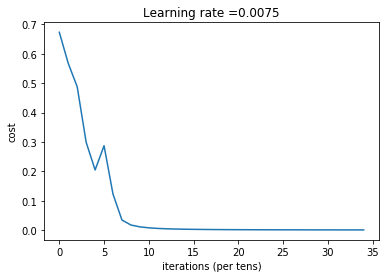

Train Accuracy -->0.9999999999999998
Testing Accuracy --->0.76


In [255]:

layers_dims = [12288, 20, 20,20,7, 5, 1] #  4-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 3500,learning_rate=0.0075, print_cost = True)
print("Train Accuracy -->{}".format(predict(train_x,train_y,parameters)))
print("Testing Accuracy --->{}".format(predict(test_x,test_y,parameters)))


In [215]:
def predict(X,Y,parameters):
  AL, caches = L_model_forward(parameters=parameters,X=X)
  yhat= AL > 0.5
  acc = np.sum((yhat == Y)/X.shape[1])
  return acc



0.3400000000000001

In [222]:
print("Train Accuracy -->{}".format(predict(train_x,train_y,parameters)))
print("Testing Accuracy --->{}".format(predict(test_x,test_y,parameters)))


Train Accuracy -->0.6555023923444976
Testing Accuracy --->0.3400000000000001


y = 0. It's a non-cat picture.


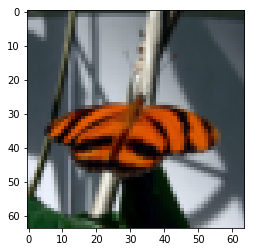

In [197]:
# Example of a picture
index = 45
plt.imshow(test_x_orig[index])
print ("y = " + str(test_y[0,index]) + ". It's a " + classes_test[test_y[0,index]].decode("utf-8") +  " picture.")

End Deep Neural Network